In [4]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [7]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


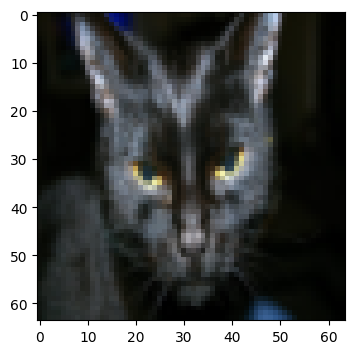

In [8]:
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [9]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [11]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [12]:
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)

In [28]:
def two_layer_model(X, Y, layer_dims, learning_rate =  0.0075, num_iterations = 300, print_cost = False):
    np.random.seed(1)
    grads = {}
    costs = []
    m= X.shape[1]
    (n_x, n_h, n_y) = layer_dims

    parameters = initialize_parameters(n_x, n_y, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")

        cost = compute_cost(A2, Y)

        dA2 = -(np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache2, activation = "relu")


        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters = update_parameters(parameters, grads, learning_rate)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters
        

Cost after iteration 0: 0.6941101134647648
Cost after iteration 100: 0.6757073829873756
Cost after iteration 200: 0.664443608210227
Cost after iteration 300: 0.6574291242926698
Cost after iteration 400: 0.6530312642228737
Cost after iteration 500: 0.6502533902131531
Cost after iteration 600: 0.6484847027534094
Cost after iteration 700: 0.6473485561060024
Cost after iteration 800: 0.6466111301909441
Cost after iteration 900: 0.6461263305395039
Cost after iteration 1000: 0.6458023406772624
Cost after iteration 1100: 0.6455811614840831
Cost after iteration 1200: 0.6454259955526249
Cost after iteration 1300: 0.6453134103940503
Cost after iteration 1400: 0.6452284375293986
Cost after iteration 1500: 0.6451614896608296
Cost after iteration 1600: 0.6451064117893078
Cost after iteration 1700: 0.6450592440104408
Cost after iteration 1800: 0.6450174333611198
Cost after iteration 1900: 0.644979330285772
Cost after iteration 2000: 0.6449438661811507
Cost after iteration 2100: 0.6449103465042355
Co

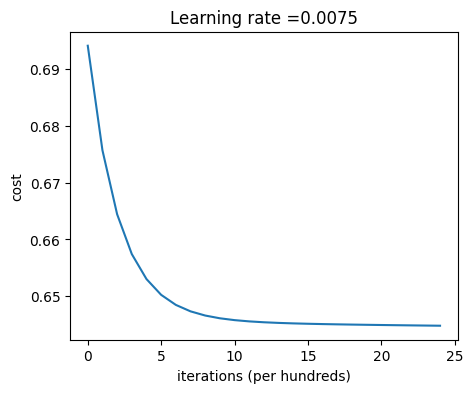

In [29]:
parameters = two_layer_model(train_x, train_y, layer_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost = True)

In [30]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.6555023923444976


In [31]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.3400000000000001


In [32]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    

    np.random.seed(1)
    costs = []                         
   
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [34]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


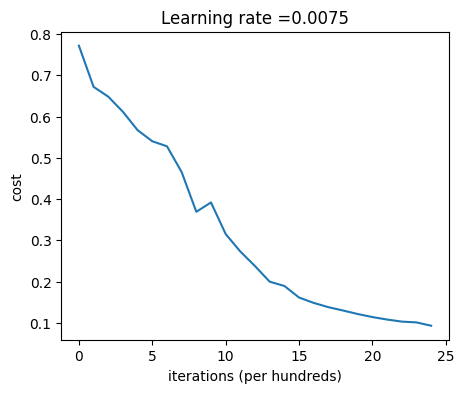

In [35]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [36]:


pred_train = predict(train_x, train_y, parameters)



Accuracy: 0.9856459330143539


In [37]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


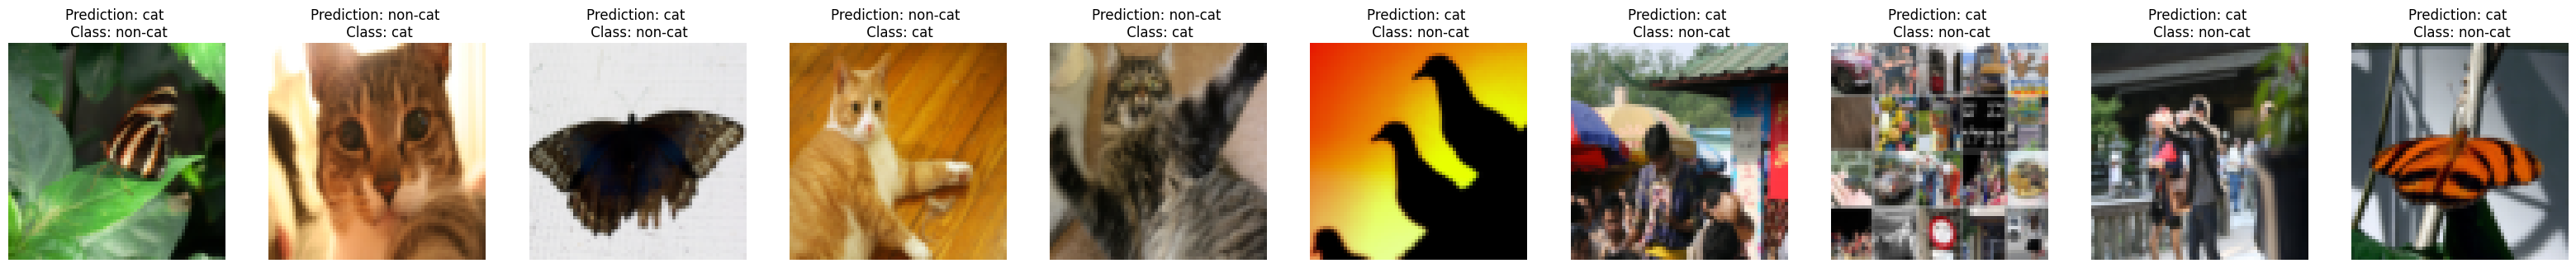

In [38]:
print_mislabeled_images(classes, test_x, test_y, pred_test)